Tarea 3_ Algoritmos de Aprendizaje Supervisado
Estudiante: Karol Jiseth Martínez Páez
Tutor: Handry Orozco
Nro. de grupo: 202016908_72
Universidad Nacional Abierta y a Distancia_ UNAD 
Escuela de Ciencia Básica, Tecnología e Ingeniería
CEAD JAG_ José Acevedo y Gómez
Ingeniería de Sistemas
Análisis de Datos_202016908A_1704
octubre, 2024 Bogotá D.C.

In [12]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importar Librerias para implementar modelos de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
# Cargar el dataset de calidad del vino tinto
data = pd.read_csv('winequality-red.csv')

In [28]:
# Ver los primeros registros
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
data.shape

(1599, 12)

In [32]:
# Paso 1: Análisis Exploratorio de Datos (EDA)
# Resumen de los datos
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

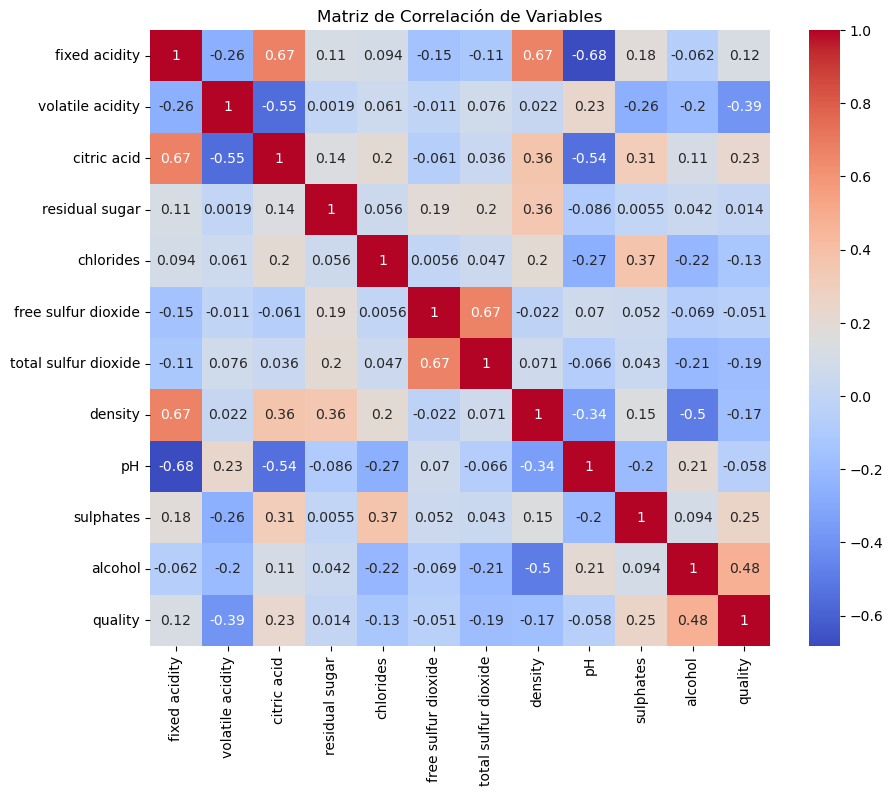

In [37]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables')
plt.show()

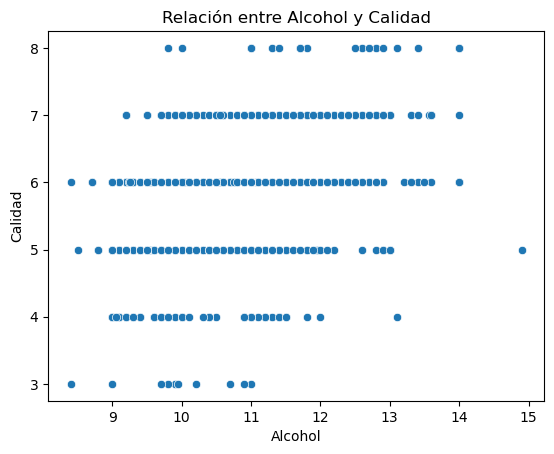

Correlación entre Alcohol y Calidad: 0.4761663240011359


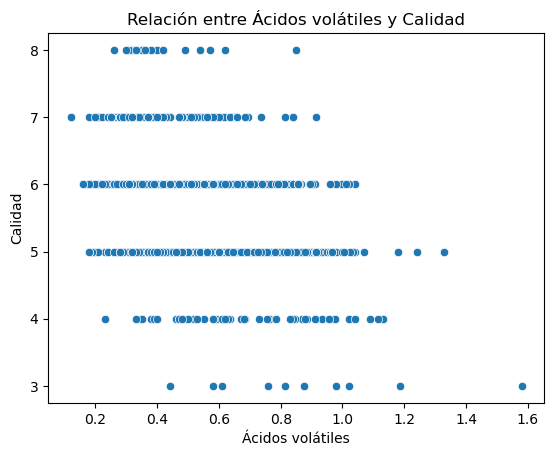

Correlación entre Ácidos volátiles y Calidad: -0.390557780264007


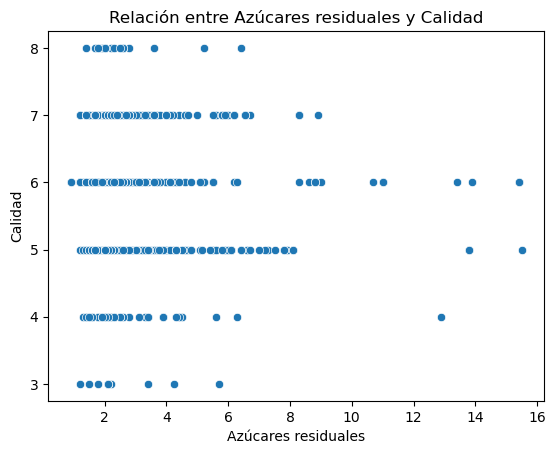

Correlación entre Azúcares residuales y Calidad: 0.013731637340066305


In [150]:
# Gráfico de dispersión para Alcohol vs Calidad
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

correlacion_alcohol_calidad = data['alcohol'].corr(data['quality'])
print(f"Correlación entre Alcohol y Calidad: {correlacion_alcohol_calidad}")

# Gráfico de dispersión para Ácidos volátiles vs Calidad
sns.scatterplot(x='volatile acidity', y='quality', data=data)
plt.title('Relación entre Ácidos volátiles y Calidad')
plt.xlabel('Ácidos volátiles')
plt.ylabel('Calidad')
plt.show()

correlacion_acidos_calidad = data['volatile acidity'].corr(data['quality'])
print(f"Correlación entre Ácidos volátiles y Calidad: {correlacion_acidos_calidad}")

# Gráfico de dispersión para Azúcares residuales vs Calidad
sns.scatterplot(x='residual sugar', y='quality', data=data)
plt.title('Relación entre Azúcares residuales y Calidad')
plt.xlabel('Azúcares residuales')
plt.ylabel('Calidad')
plt.show()

correlacion_azucar_calidad = data['residual sugar'].corr(data['quality'])
print(f"Correlación entre Azúcares residuales y Calidad: {correlacion_azucar_calidad}")


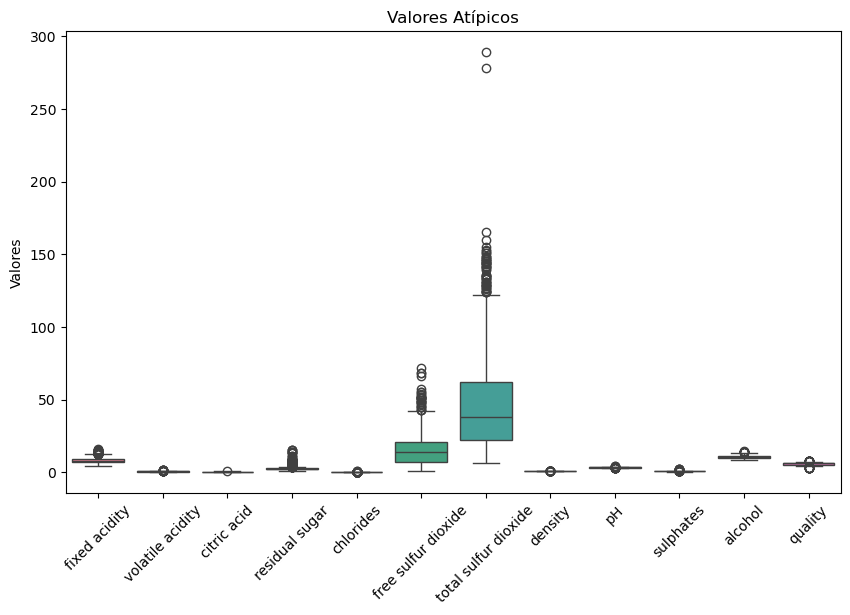

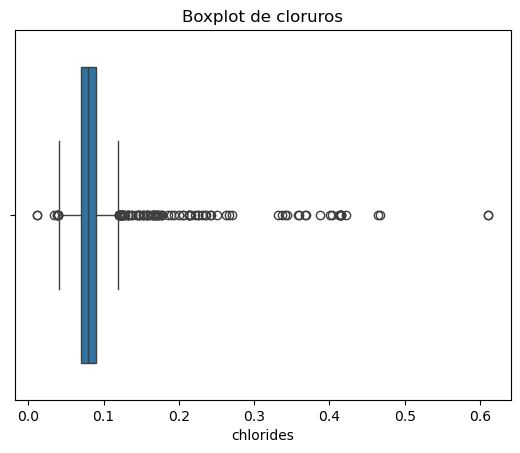

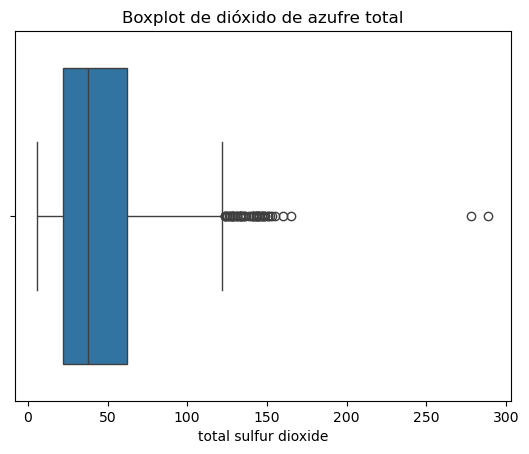

In [152]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']])
plt.xticks(rotation=45)
plt.title('Valores Atípicos')
plt.ylabel('Valores')
plt.show()

# Boxplot para cloruros
sns.boxplot(x=data['chlorides'])
plt.title('Boxplot de cloruros')
plt.show()

# Boxplot para dióxido de azufre total
sns.boxplot(x=data['total sulfur dioxide'])
plt.title('Boxplot de dióxido de azufre total')
plt.show()

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

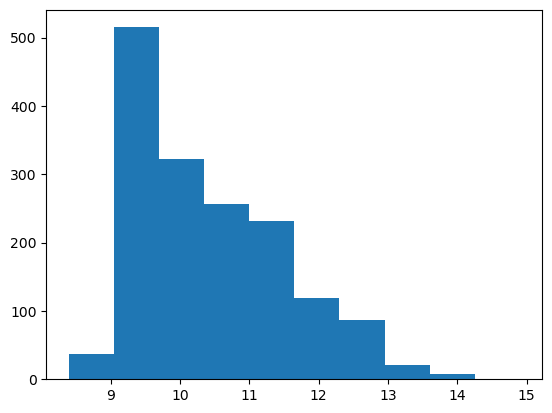

In [144]:
plt.hist(data.alcohol)

In [54]:
predictors_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
target_col = ['alcohol']
predictors = data[predictors_col]
target = data[target_col]
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [56]:
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [58]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


In [98]:
# Paso 2: Preprocesamiento de Datos
# Verificar valores faltantes
print(data.isnull().sum())

# Rellenar valores faltantes con la media
data.fillna(data.mean(), inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [154]:
# Paso 3: Selección de Características

X = data.drop('quality', axis=1)
y = data['quality']

# Selección de características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
print(selector.scores_)


[  6.28308116  60.91399283  19.69066447   1.05337358   6.03563859
   4.7542331   25.47850952  13.3963569    4.3417643   22.27337609
 115.85479747]


In [156]:
# Paso 4: División del Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Paso 5: Entrenamiento del Modelo
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Paso 6: Evaluación del Modelo
from sklearn.metrics import classification_report

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.10      0.10        10
           5       0.64      0.65      0.65       130
           6       0.57      0.55      0.56       132
           7       0.55      0.55      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.57      0.57      0.57       320



[Text(0.5661671605603448, 0.9722222222222222, 'x[10] <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9.0, 43.0, 551.0, 506.0, 157.0, 13.0]'),
 Text(0.3705347521551724, 0.9166666666666666, 'x[6] <= 98.5\ngini = 0.541\nsamples = 786\nvalue = [6.0, 27.0, 465.0, 256.0, 30.0, 2.0]'),
 Text(0.2281384698275862, 0.8611111111111112, 'x[9] <= 0.575\ngini = 0.568\nsamples = 689\nvalue = [6.0, 26.0, 375.0, 251.0, 29.0, 2.0]'),
 Text(0.07758620689655173, 0.8055555555555556, 'x[10] <= 9.75\ngini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'),
 Text(0.039224137931034485, 0.75, 'x[8] <= 3.54\ngini = 0.389\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]'),
 Text(0.03577586206896552, 0.6944444444444444, 'x[10] <= 9.075\ngini = 0.372\nsamples = 162\nvalue = [2, 11, 126, 22, 1, 0]'),
 Text(0.013793103448275862, 0.6388888888888888, 'x[3] <= 2.05\ngini = 0.711\nsamples = 11\nvalue = [1, 3, 3, 4, 0, 0]'),
 Text(0.006896551724137931, 0.5833333333333334, 'x[7] <= 0.996\ngini = 0.48\nsamples = 5\nval

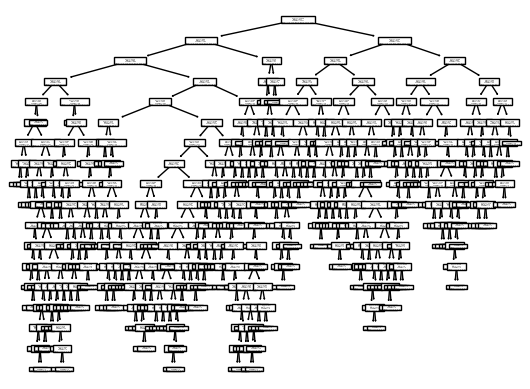

In [66]:
# Paso 7: Visualización de Resultados
from sklearn import tree

tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [70]:
predicciones = arbol.predict(X_test)

In [72]:
predicciones

array([5, 4, 6, 4, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6,
       6, 6, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 6,
       6, 5, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 6, 4, 5, 6, 5, 7, 7, 6, 5, 4, 6, 5, 6, 6, 5, 5, 6, 6, 4, 5,
       5, 5, 5, 7, 5, 6, 8, 5, 7, 5, 6, 5, 6, 5, 3, 5, 5, 5, 7, 5, 7, 5,
       6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 5, 6,
       5, 7, 5, 6, 5, 5, 7, 5, 5, 6, 5, 7, 8, 5, 5, 7, 6, 4, 6, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 6, 5, 7, 6, 5, 7, 5, 7, 6, 5, 7, 5,
       6, 7, 6, 7, 5, 5, 8, 5, 6, 4, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5, 7,
       5, 6, 6, 6, 7, 7, 8, 5, 5, 6, 5, 7, 6, 6, 5,

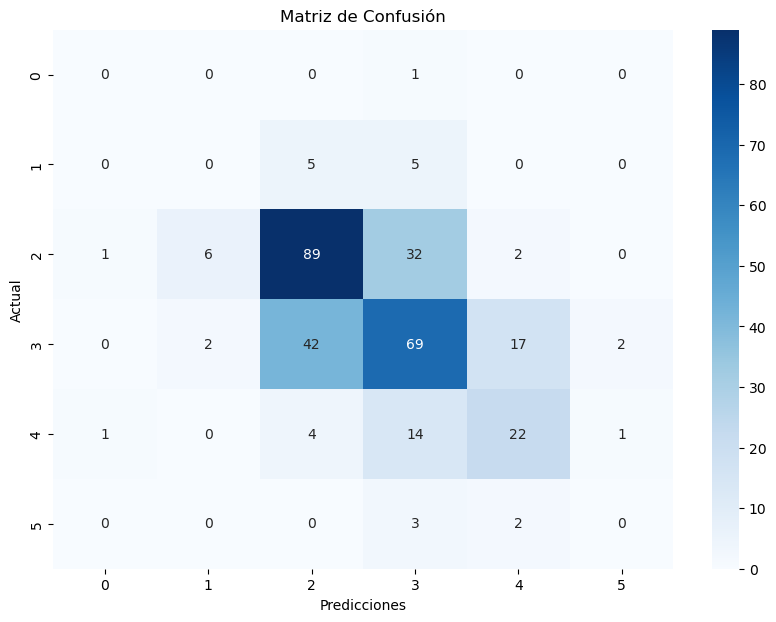

In [90]:
# Matriz de confusión

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
# Paso 8: Interpretación y Documentación
# Resultados e Interpretación

1. **Métricas de Desempeño**: Las métricas de precisión, recall y F1-score indican cómo el modelo ha clasificado las distintas calidades de vino.
2. **Características Relevantes**: Las características con puntuaciones más altas en SelectKBest son las más influyentes en la predicción de la calidad del vino.
3. **Propuestas de Mejora**: Ajustar hiperparámetros del modelo, probar diferentes técnicas de pre-procesamiento o usar modelos más complejos pueden mejorar los resultados.
